## Homework 6: Decision Trees and Ensemble Learning

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

```bash
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [2]:
data = 'jamb_exam_results.csv'
df = pd.read_csv(data)
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [3]:
df.head().T

,0,1,2,3,4
JAMB_Score,192,207,182,210,199
Study_Hours_Per_Week,22,14,29,29,12
Attendance_Rate,78,88,87,99,98
Teacher_Quality,4,4,2,2,3
Distance_To_School,12.4,2.7,9.6,2.6,8.8
School_Type,Public,Public,Public,Public,Public
School_Location,Urban,Rural,Rural,Urban,Urban
Extra_Tutorials,Yes,No,Yes,No,No
Access_To_Learning_Materials,Yes,Yes,Yes,Yes,Yes
Parent_Involvement,High,High,High,Medium,Medium


In [4]:
df.shape

(5000, 17)

### Preparing the dataset 

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [6]:
df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,Public,Public,Public,Public,Public
school_location,Urban,Rural,Rural,Urban,Urban
extra_tutorials,Yes,No,Yes,No,No
access_to_learning_materials,Yes,Yes,Yes,Yes,Yes
parent_involvement,High,High,High,Medium,Medium


In [7]:
# Remove the student_id column
del df['student_id']

In [8]:
df.shape

(5000, 16)

In [9]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [10]:
# Fill missing values with zeros
df = df.fillna(0)

In [11]:
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [12]:
# Do train/validation/test split with 60%/20%/20% distribution
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [13]:
len(df_train), len(df_val), len(df_test)

(3000, 1000, 1000)

In [14]:
df_train.head()

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,Public,Urban,No,Yes,Medium,Low,21,Female,Low,0,3
1,11,80,2,3.3,Public,Urban,Yes,Yes,Medium,High,22,Female,Medium,Secondary,1
2,31,82,1,8.3,Public,Urban,Yes,Yes,Low,High,19,Female,High,Tertiary,2
3,29,79,1,15.8,Public,Rural,Yes,Yes,Low,Low,19,Male,Low,Primary,2
4,28,96,2,8.9,Private,Rural,Yes,Yes,Medium,Low,19,Male,High,Secondary,3


In [15]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices
dv = DictVectorizer(sparse=True)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [17]:
# Train a decision tree regressor to predict the jamb_score variable
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [18]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



**Ans:** `study_hours_per_week` is used for splitting the data.

## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 22.13
* 42.13
* 62.13
* 82.12

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [20]:
# Train a random forest regressor to predict the jamb_score variable
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [21]:
# Compute the RMSE of this model on validation data
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

np.float64(42.13724207871227)

In [22]:
round(rmse, 3)

np.float64(42.137)

**Ans:** The RMSE of this model on the validation data is `42.13`. 

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
from tqdm.auto import tqdm

In [25]:
scores = []

# Experiment with different values of the n_estimators parameter
for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Evaluate the model on the validation dataset
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)

    result = {
        'n_estimators': n,
        'rmse': rmse
    }
    scores.append(result)

df_scores = pd.DataFrame(scores)

  0%|          | 0/20 [00:00<?, ?it/s]

In [26]:
df_scores

,n_estimators,rmse
0,10,42.137242
1,20,41.461215
2,30,41.106171
3,40,40.917194
4,50,40.852279
5,60,40.784281
6,70,40.677098
7,80,40.539333
8,90,40.504346
9,100,40.516805


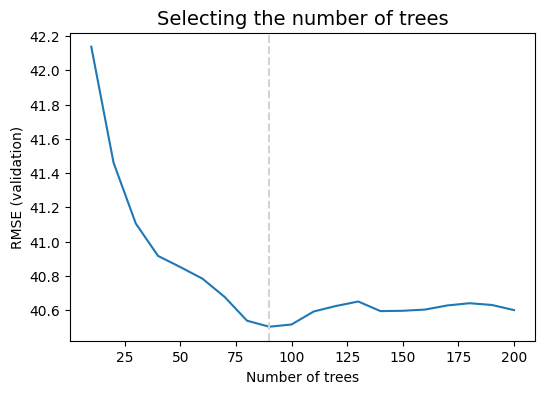

In [27]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

plt.axvline(x=list(df_scores.iloc[df_scores.rmse.idxmin()])[0], color='lightgrey', linestyle='--')

plt.title('Selecting the number of trees', fontsize=14)
plt.xlabel('Number of trees', fontsize=10)
plt.ylabel('RMSE (validation)', fontsize=10)

plt.show()

In [28]:
df_scores.round(3).iloc[df_scores.rmse.idxmin()]

n_estimators    90.000
rmse            40.504
Name: 8, dtype: float64

**Ans:** The RMSE stops improving after `n_estimators=90`. As `90` is not available as an option, the closest solution would be `80`. 

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [29]:
depths = [10, 15, 20, 25]
scores = []

# Experiment with different values of max_depth
for depth in tqdm(depths):
    rf = RandomForestRegressor(
        n_estimators=None,
        max_depth=depth,
        random_state=1,
        n_jobs=-1,
        # Speed up the training by training only 10 additional new trees each time
        warm_start=True
    )

    # Experiment with different values of n_estimators
    for n in tqdm(range(10, 201, 10)):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)

        result = {
            'max_depth': depth,
            'n_estimators': n,
            'rmse': rmse
        }
        scores.append(result)

df_scores = pd.DataFrame(scores)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [30]:
df_scores.sort_values(by='rmse').reset_index(drop=True).head()

,max_depth,n_estimators,rmse
0,10,90,40.173900
1,10,80,40.210305
2,10,100,40.250490
3,10,40,40.270069
4,10,60,40.277035


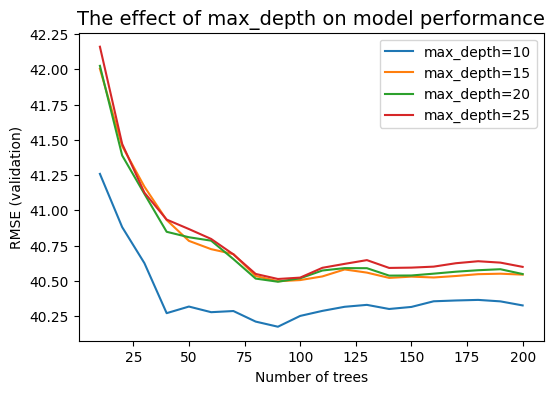

In [31]:
plt.figure(figsize=(6, 4))

for depth in depths:
    df_subset = df_scores[df_scores.max_depth == depth]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f'max_depth={depth}')

plt.title('The effect of max_depth on model performance', fontsize=14)
plt.xlabel('Number of trees', fontsize=10)
plt.ylabel('RMSE (validation)', fontsize=10)

plt.legend()
plt.show()

In [32]:
# Calculate the mean RMSE for each different value of max_depth
df_scores.groupby('max_depth').rmse.mean().round(3)

max_depth
10    40.392
15    40.735
20    40.740
25    40.788
Name: rmse, dtype: float64

In [33]:
df_scores.groupby('max_depth').rmse.mean().round(3).idxmin()

np.int64(10)

**Ans:** The best `max_depth` is `10` with a mean RMSE of 40.392. 

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`

In [34]:
# Train the model with these parameters
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=20, 
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [35]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
# Get the feature importance information from this model
df_importances['importance'] = rf.feature_importances_

df_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,study_hours_per_week,0.248354
1,attendance_rate,0.149729
2,distance_to_school,0.136486
3,teacher_quality,0.082682
4,age,0.069311
5,assignments_completed,0.031517
6,socioeconomic_status=High,0.025714
7,parent_involvement=High,0.022919
8,it_knowledge=High,0.017719
9,parent_education_level=Secondary,0.016957


In [36]:
options = ['study_hours_per_week', 'attendance_rate', 'distance_to_school', 'teacher_quality']

result_dict = df_importances.to_dict(orient='records')
results = [row for row in result_dict if row['feature'] in options]
df_results = pd.DataFrame(results).sort_values(by='importance', ascending=False).reset_index(drop=True)
df_results

,feature,importance
0,study_hours_per_week,0.248354
1,attendance_rate,0.149729
2,distance_to_school,0.136486
3,teacher_quality,0.082682


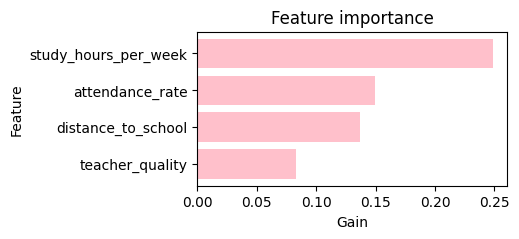

In [37]:
# Plot bar chart for feature importance
plt.figure(figsize=(4, 2))

num = len(results)
plt.barh(range(num), df_results['importance'][::-1], color='pink')
plt.yticks(range(num), df_results['feature'][::-1])

plt.title('Feature importance', fontsize=12)
plt.xlabel('Gain', fontsize=10)
plt.ylabel('Feature', fontsize=10)

plt.show()

In [38]:
# Get the most important feature out of those 4 options
max(results, key=lambda x: x['importance'])

{'feature': 'study_hours_per_week', 'importance': 0.2483536119939654}

**Ans:** `study_hours_per_week` is the most important feature among the four options.

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [39]:
# Install XGBoost
!pip install xgboost

In [40]:
import xgboost as xgb

In [41]:
features = dv.feature_names_
features

['access_to_learning_materials=No',
 'access_to_learning_materials=Yes',
 'age',
 'assignments_completed',
 'attendance_rate',
 'distance_to_school',
 'extra_tutorials=No',
 'extra_tutorials=Yes',
 'gender=Female',
 'gender=Male',
 'it_knowledge=High',
 'it_knowledge=Low',
 'it_knowledge=Medium',
 'parent_education_level',
 'parent_education_level=Primary',
 'parent_education_level=Secondary',
 'parent_education_level=Tertiary',
 'parent_involvement=High',
 'parent_involvement=Low',
 'parent_involvement=Medium',
 'school_location=Rural',
 'school_location=Urban',
 'school_type=Private',
 'school_type=Public',
 'socioeconomic_status=High',
 'socioeconomic_status=Low',
 'socioeconomic_status=Medium',
 'study_hours_per_week',
 'teacher_quality']

In [42]:
# Create DMatrix for trainand validation
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [43]:
# Create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [44]:
scores = {}

In [45]:
%%capture output_03

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [46]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [47]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output_03)
key

'eta=0.3'

In [48]:
%%capture output_01

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [49]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output_01)
key

'eta=0.1'

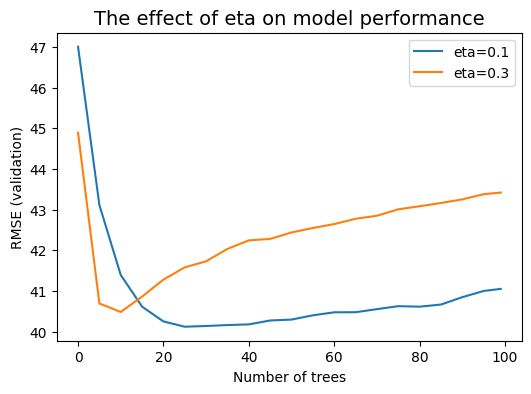

In [50]:
plt.figure(figsize=(6, 4))

plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_rmse, label='eta=0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_rmse, label='eta=0.3')

plt.title('The effect of eta on model performance', fontsize=14)
plt.xlabel('Number of trees', fontsize=10)
plt.ylabel('RMSE (validation)', fontsize=10)
plt.legend()

plt.show()

In [51]:
scores['eta=0.1'].sort_values(by='val_rmse').reset_index(drop=True).head()

,num_iter,train_rmse,val_rmse
0,25,32.55850,40.12003
1,30,31.76039,40.13806
2,35,31.01425,40.16103
3,40,30.13427,40.17753
4,20,33.67389,40.25010


In [52]:
scores['eta=0.3'].sort_values(by='val_rmse').reset_index(drop=True).head()

,num_iter,train_rmse,val_rmse
0,10,31.63404,40.48319
1,5,34.57756,40.69096
2,15,29.41497,40.86107
3,20,27.49658,41.27921
4,25,26.34353,41.57975


**Ans:** `eta` of `0.1` leads to the best RMSE score on the validation dataset.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw06
* If your answer doesn't match options exactly, select the closest one
